# Other variables only & Other variables + Word2vec mean/Doc2vec

# Other variables data clean.

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import normalize, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from numpy.linalg import svd

In [3]:
loans = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/kiva_ds_csv/loans.csv',skiprows=6)

In [4]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,109156,Afolabi,English,Afolabi O. is 35 years old and single. He sell...,NaN,550.0,550.0,funded,321370.0,NaN,...,10.0,20,1,1,NaN,Afolabi,male,true,monthly,field_partner
1,109347,Laura,Spanish,Z. es socia del Banco Comunal Virgen Maria.\nZ...,Z. is a member of Virgen Maria comunal bank. ...,550.0,550.0,funded,321669.0,NaN,...,6.0,18,1,1,NaN,Laura,female,true,monthly,field_partner
2,109490,Betania IV-B Group,English,Betania IV-B is a group of 10 farmers living i...,NaN,3150.0,3150.0,funded,319693.0,NaN,...,14.0,87,4,3,NaN,"Henderina, Margen, Dominggus, Efni, Elias, Fra...","female, male, male, male, male, female, male, ...","true, true, false, true, true, true, true, fal...",bullet,field_partner
3,109570,Ajka,English,Ajka comes from a suburb of the town of Banovi...,NaN,575.0,575.0,funded,322148.0,NaN,...,15.0,22,1,1,NaN,Ajka,female,true,monthly,field_partner
4,109819,Maria Salome,Spanish,La señora Salome pertenece al Banco Comunal “R...,Señora Salome is a member of the Banco Comunal...,500.0,500.0,funded,320794.0,NaN,...,7.0,18,1,1,NaN,Maria Salome,female,true,irregular,field_partner


In [9]:
loans.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'],
      dtype='object')

In [126]:
loans.shape

(1682790, 34)

#### Loan Information
LOAN_ID *, LOAN_NAME *ACTIVITY_NAME : ONEHOT, SECTOR_NAME *
#### Partner Information
PARTNER_ID * <br />
#### Lender Information
NUM_LENDERS_TOTAL : NUMERIC, NUM_JOURNAL_ENTRIES : NUMERIC, NUM_BULK_ENTRIES : NUMERIC
#### Borrower Information
BORROWER_NAMES *, BORROWER_GENDERS : MALE/FEMALE, BORROWER_PICTURED *
#### Natural Language Processing
ORIGINAL_LANGUAGE, DESCRIPTION, DESCRIPTION_TRANSLATED, LOAN_USE
#### Funded Information
FUNDED_AMOUNT *, LOAN_AMOUNT *, STATUS : RESPONSE
#### Computer Vision
IMAGE_ID, VIDEO_ID
#### Time
POSTED_TIME, PLANNED_EXPIRATION_TIME, DISBURSE_TIME, RAISED_TIME, LENDER_TERM
#### Place
COUNTRY_CODE *, COUNTRY_NAME, TOWN_NAME *, CURRENCY_POLICY : BINARY, CURRENCY_EXCHANGE_COVERAGE_RATE
#### Other Variable
TAGS : ONEHOT, REPAYMENT_INTERVAL : BULLET/IRREGULAR/MONTHLY/WEEKLY, DISTRIBUTION_MODEL : BINARY

In [6]:
down = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/down.csv')

In [7]:
down.head()

,Unnamed: 0,index,loan_amount,original_language,description,activity_name,sector_name,country_name,town_name,status,id,posted_time,description_length,currency_policy,num_lenders_total
0,0,27,4475.0,Russian,Vitaliy lives in the city of Melitopol. He is ...,Personal Housing Expenses,Housing,Ukraine,Melitopol,expired,1470603,2018-02-16 13:57:59.000 +0000,420,shared,73
1,1,44,1200.0,English,"Youn, 34, lives with family members in a rural...",Farming,Agriculture,Cambodia,"Ratanakiri province, Borkeo district",expired,1514939,2018-04-23 09:20:53.000 +0000,708,shared,10
2,2,77,1150.0,English,"Living in a rural area of Battambang province,...",Farming,Agriculture,Cambodia,"Battambang province, Ratanak Mondul district",expired,1513542,2018-04-20 10:11:29.000 +0000,608,shared,10
3,3,113,1200.0,English,"Lilia, 57, lives in Danao, Plaridel, Misamis O...",Fish Selling,Food,Philippines,Plaridel-Danao,expired,446946,2012-07-05 06:12:24.000 +0000,298,shared,25
4,4,121,300.0,English,Melane is 32 years old and married with three ...,General Store,Retail,Philippines,"Banga, Aklan",expired,1644432,2018-11-12 06:12:43.000 +0000,321,shared,5


In [146]:
# initialize
X = []

## Loan Information

#### ACTIVITY_NAME

In [147]:
# get dummies
ACTIVITY_NAME = pd.get_dummies(loans['ACTIVITY_NAME'])

In [148]:
# append
X.append(ACTIVITY_NAME)

#### LOAN_AMOUNT

In [149]:
X.append(loans['LOAN_AMOUNT'])

## Lender Information

In [150]:
# append #try not to consider it
X.append(loans[["NUM_LENDERS_TOTAL"]])

## Borrower Information

#### BORROWER_GENDERS

In [151]:
# count freq
male = []
female = []
for i in loans['BORROWER_GENDERS']:
    if type(i) == str:
        temp = str(', ' + i).split(', ')[1:]
        male.append(temp.count('male'))
        female.append(temp.count('female'))
    else:
        male.append(0)
        female.append(0)
# merge dataframe
BORROWER_GENDERS = pd.DataFrame({'MALE':male,'FEMALE':female})

In [152]:
# append
X.append(BORROWER_GENDERS)

## Natural Language Processing

## Place

#### COUNTRY_NAME

In [129]:
# get dummies
COUNTRY_NAME = pd.get_dummies(loans['COUNTRY_NAME'])

In [153]:
# append
X.append(COUNTRY_NAME)

#### CURRENCY_POLICY

In [131]:
# binary
CURRENCY_POLICY = pd.DataFrame({'CURRENCY_POLICY':loans['CURRENCY_POLICY'] == 'shared'})

In [154]:
# append
X.append(CURRENCY_POLICY)

#### CURRENCY_EXCHANGE_COVERAGE_RATE

In [133]:
# fill na
CURRENCY_EXCHANGE_COVERAGE_RATE = loans['CURRENCY_EXCHANGE_COVERAGE_RATE'].fillna(0)

In [155]:
# append
X.append(CURRENCY_EXCHANGE_COVERAGE_RATE)

In [148]:
X[4].shape

(1682790,)

## Other Variables

#### TAGS

In [135]:
# split tags
TAGS_SPLIT = []
for i in loans['TAGS']:
    if type(i)==str:
        j = ',' + i
        j = j[1:]
        TAGS_SPLIT.append(j.split(', '))
    else:
        TAGS_SPLIT.append(None)
# set of tags
TAGS_SET = list()
for i in TAGS_SPLIT:
    if i:
        for j in i:
            if j not in TAGS_SET:
                TAGS_SET.append(j)
# binarize tags
TAGS_DICT = {i: [] for i in TAGS_SET}
for i in TAGS_SPLIT:
    for j in TAGS_DICT.keys():
        if i:
            if j in i:
                TAGS_DICT[j].append(1)
            else:
                TAGS_DICT[j].append(0)
        else:
            TAGS_DICT[j].append(0)
# merge dataframe
TAGS = pd.DataFrame(TAGS_DICT)

In [156]:
# append
X.append(TAGS)

#### REPAYMENT_INTERVAL

In [137]:
# get dummies
REPAYMENT_INTERVAL = pd.get_dummies(loans['REPAYMENT_INTERVAL'])

In [157]:
# append
X.append(REPAYMENT_INTERVAL)

#### DISTRIBUTION_MODEL

In [139]:
# binary
DISTRIBUTION_MODEL = pd.DataFrame({'DISTRIBUTION_MODEL':loans['DISTRIBUTION_MODEL'] == 'field_partner'})

In [158]:
# append
X.append(DISTRIBUTION_MODEL)

## Repsonse Value

In [159]:
# append
X.append(loans["STATUS"])
# concat
X = pd.concat(X, axis = 1)

In [160]:
X = X[X['STATUS'] != 'fundRaising']
X = X[X['STATUS'] != 'refunded']
y = pd.DataFrame({'STATUS': [int(i == 'funded') for i in X['STATUS']]})
X = X.drop('STATUS', 1)

In [144]:
X.head()

,Adult Care,Agriculture,Air Conditioning,Animal Sales,Aquaculture,Arts,Auto Repair,Bakery,Balut-Making,Barber Shop,...,#Team Guys Holding Fish,#US immigrant,#Powerful Story,#Married,user_like,#Pre-disbursed,bullet,irregular,monthly,DISTRIBUTION_MODEL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True


In [77]:
loans.shape

(1668825, 34)

In [161]:
X.shape

(1682656, 311)

In [30]:
len(loans.LOAN_ID)

1668825

In [78]:
loans_id = loans.LOAN_ID

In [79]:
down = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/down.csv')

In [23]:
down.shape

(150767, 15)

In [85]:
d2 = {}
for i in range(len(down)):
    d2[down.id[i]] = i


In [84]:
np.where(1470603 == loans_id)[0][0]

27

In [40]:
test_label = np.load('/Users/zhanhaochen/Desktop/STA160/test_label.npy')

In [95]:
comb_down = np.load('/Users/zhanhaochen/Desktop/STA160/comb_down.npy')

In [96]:
comb_down.shape

(150767, 310)

In [ ]:
with open('/home/hzhan828/kiva/removed_indexes.pkl', 'rb') as handle:
    removed_indexes = pickle.load(handle)

## Split Data

In [188]:
comb_amount = normalize(comb_amount)

X_train, X_test, y_train, y_test = train_test_split(comb_amount, test_label,test_size = 0.1, random_state = 0)




In [314]:
comb_down.shape

(150767, 310)

In [43]:
X_train.shape

(135690, 19)

## Regularized Logistic Regression

In [189]:
import warnings
warnings.filterwarnings("ignore")
X_log_params = {
    'penalty' : ['l1', 'l2'],
    'C' : [.1, 5, 50]
}
X_log_gs = GridSearchCV(estimator=LogisticRegression(), param_grid=X_log_params, cv = 5, verbose=0,scoring='f1')
X_log_gs.fit(X_train, y_train)
print('best score of other variables with Logistic Regression is:', X_log_gs.best_score_.round(4))

best score of other variables with Logistic Regression is: 0.8068


In [102]:
print(X_log_gs.best_estimator_.get_params())

{'C': 50, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [191]:
from sklearn import metrics
logreg = LogisticRegression(C = 50, penalty = 'l1', random_state=1) #l1 is Ridge 

logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.8285467931286065


In [105]:
probs_nut = X_log_gs.predict_proba(X_test)[:,1]

In [321]:
X_log_gs.predict_proba(X_test)

array([[0.3483243 , 0.6516757 ],
       [0.00899669, 0.99100331],
       [0.85148364, 0.14851636],
       ...,
       [0.91251022, 0.08748978],
       [0.418479  , 0.581521  ],
       [0.54258492, 0.45741508]])

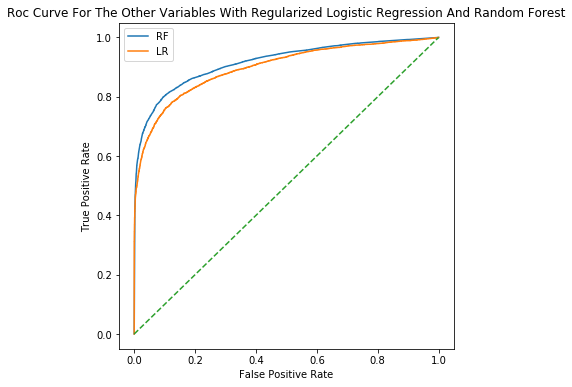

In [109]:
from sklearn.metrics import roc_curve
y_numerical = y_test
fpr, tpr, _ = roc_curve(y_numerical, probs_nut)
plt.figure(figsize = (6,6))
plt.plot(fpr_rf, tpr_rf, label = 'RF');
plt.plot(fpr, tpr, label = 'LR');
plt.plot([0,max(y_numerical)],[0, max(y_numerical)], '--'); # it takes only encoded numerical y
plt.title('ROC curve for the other variables with regularized logistic regression and random forest'.title());
plt.xlabel('false positive rate'.title());
plt.ylabel('true positive rate'.title());
plt.legend()

## Linear Model

In [112]:
class LinearClassifier(LinearRegression):
    def predict(self, X):
        return np.round(LinearRegression.predict(self, X))
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
estimator = LinearClassifier(fit_intercept = False, n_jobs = -1)
estimator.fit(X_train, y_train)
print('Accuracy of Linear :', estimator.score(X_test, y_test))

Accuracy of Linear : 0.7737613583604165


In [113]:
class RidgeClassifier(Ridge):
    def predict(self, X):
        return np.round(Ridge.predict(self, X))
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
estimator = RidgeClassifier(fit_intercept = False, alpha = 1)
estimator.fit(X_train, y_train)
print('Accuracy of Ridge :', estimator.score(X_test, y_test))

Accuracy of Ridge : 0.7244809975459309


## Random Forest Classifier

In [162]:
estimator = RandomForestClassifier(n_estimators = 50, n_jobs = -1)
estimator.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier :', estimator.score(X_test, y_test))

Accuracy of Random Forest Classifier : 0.852357896133183


In [106]:
probs_nut_rf = estimator.predict_proba(X_test)[:,1]

In [108]:
y_numerical_rf = y_test
fpr_rf, tpr_rf, _ = roc_curve(y_numerical_rf, probs_nut_rf)


In [163]:
importance = estimator.feature_importances_
features = pd.Series(list(X), name = 'features')

In [164]:
importance = pd.Series(importance, name = 'importance')



In [177]:
loans.DISTRIBUTION_MODEL.unique()

array(['field_partner', 'direct'], dtype=object)

In [165]:
RFimportance = pd.concat([features, importance],axis = 1)

In [176]:
RFimportance.sort_values(by = 'importance',ascending = False).head(20)

,features,importance
265,CURRENCY_POLICY,0.084605
164,NUM_LENDERS_TOTAL,0.069178
309,monthly,0.064061
308,irregular,0.059904
310,DISTRIBUTION_MODEL,0.059295
280,#Widowed,0.056552
163,LOAN_AMOUNT,0.047371
264,Zimbabwe,0.036652
267,#Schooling,0.030490
271,#Job Creator,0.020676


In [241]:
RFimportance.to_csv('RFimportance')

In [ ]:
class SingularValueClassifier:
    def __init__(self, r):
        self.r = r
    def fit(self, X_train, y_train):
        U, S, Vh = svd(X_train)
        U = U[:, :Vh.shape[0]]
        S[S!=0] = 1/S[S!=0]
        S = np.diag(S)
        self.A = Vh.T.dot(S)
        self.b = U.T.dot(y_train.reshape(-1,1))
        self.change_rank(self.r)        
    def predict(self, X_test):
        y_pred = X_test.dot(self.beta)
        y_pred = y_pred.reshape(-1)
        return np.round(y_pred)        
    def change_rank(self, r):
        self.r = r
        A = self.A[:, :self.r]
        b = self.b[:self.r, :]
        self.beta = A.dot(b)
# estimator_model = SingularValueClassifier(r = 30)
# estimator_model.fit(X_train, y_train)
# y_pred = estimator_model.predict(X_test)
# np.mean(y_pred == y_test)
# print('Accuracy of SingularValue :', np.mean(y_pred == y_test))

In [329]:
#using doc2vec mean to input activity name
w2vmean = np.load('/Users/zhanhaochen/Desktop/STA160/w2vmean.npy')

In [332]:
w2vmean.shape

(150767, 100)

In [335]:
comb_down.shape

(150767, 310)

# MLP for w2vmean and other variables

In [347]:
test_label = test_label.reshape(150767,1)


In [195]:
#with loan_amount
from keras.layers import Input, Concatenate, Dense, Embedding, Flatten, LSTM
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
A1 = Input(shape=(311,),name='A1')

A2 = Dense(512, activation='relu',name='A2')(A1)
A3 = Dense(512, activation='relu',name='A3')(A2)
A4 = Dense(1, activation='sigmoid',name='A4')(A3)
model = Model(inputs=A1,outputs = A4)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=None, validation_split=0.1, 
          verbose=True, callbacks = [early_stopping_monitor]) 

Instructions for updating:
Use tf.cast instead.
Train on 122121 samples, validate on 13569 samples
Epoch 1/20
122121/122121 [==============================] - 17s 136us/step - loss: 0.4872 - acc: 0.7551 - val_loss: 0.4297 - val_acc: 0.8048
Epoch 2/20
122121/122121 [==============================] - 15s 125us/step - loss: 0.4281 - acc: 0.8021 - val_loss: 0.4632 - val_acc: 0.7797
Epoch 3/20
122121/122121 [==============================] - 15s 124us/step - loss: 0.4139 - acc: 0.8113 - val_loss: 0.3967 - val_acc: 0.8212
Epoch 4/20
122121/122121 [==============================] - 15s 124us/step - loss: 0.4029 - acc: 0.8163 - val_loss: 0.4058 - val_acc: 0.8196
Epoch 5/20
122121/122121 [==============================] - 15s 124us/step - loss: 0.3951 - acc: 0.8202 - val_loss: 0.3850 - val_acc: 0.8301
Epoch 6/20
122121/122121 [==============================] - 15s 126us/step - loss: 0.3902 - acc: 0.8233 - val_loss: 0.4490 - val_acc: 0.7880
Epoch 7/20
122121/122121 [=============================

In [196]:
model.evaluate(X_test, y_test)

15077/15077 [==============================] - 0s 22us/step


[0.37898607033866305, 0.829740664588446]

In [372]:
#without loan_amount
from keras.layers import Input, Concatenate, Dense, Embedding, Flatten, LSTM
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
A1 = Input(shape=(310,),name='A1')

A2 = Dense(512, activation='relu',name='A2')(A1)
A3 = Dense(512, activation='relu',name='A3')(A2)
A4 = Dense(256, activation='relu',name='A4')(A3)


B1 = Input(shape=(100,),name='B1')
B2 = Dense(256, activation='relu',name='B2')(B1)
B3 = Dense(64, activation='relu',name='B3')(B2)

merged = Concatenate()([A3,B3])
C1 = Dense(320, activation='relu',name='C1')(merged)

C2 = Dense(160, activation='relu',name='C2')(C1)
C3 = Dense(1, activation='sigmoid',name='C3')(C2)
model = Model(inputs=[A1,B1],outputs = C3)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit([X_train,w2v_train], y_train, epochs=20, batch_size=None, validation_split=0.1, 
          verbose=True, callbacks = [early_stopping_monitor]) 



Train on 122121 samples, validate on 13569 samples
Epoch 1/20
122121/122121 [==============================] - 33s 273us/step - loss: 0.4166 - acc: 0.8106 - val_loss: 0.4079 - val_acc: 0.8162
Epoch 2/20
122121/122121 [==============================] - 30s 245us/step - loss: 0.3821 - acc: 0.8307 - val_loss: 0.3899 - val_acc: 0.8270
Epoch 3/20
122121/122121 [==============================] - 31s 250us/step - loss: 0.3676 - acc: 0.8377 - val_loss: 0.3864 - val_acc: 0.8312
Epoch 4/20
122121/122121 [==============================] - 30s 245us/step - loss: 0.3547 - acc: 0.8439 - val_loss: 0.3833 - val_acc: 0.8303
Epoch 5/20
122121/122121 [==============================] - 30s 246us/step - loss: 0.3446 - acc: 0.8483 - val_loss: 0.3904 - val_acc: 0.8310
Epoch 6/20
122121/122121 [==============================] - 30s 249us/step - loss: 0.3334 - acc: 0.8542 - val_loss: 0.3979 - val_acc: 0.8267


In [374]:
model.evaluate([X_test, w2v_test], y_test)

15077/15077 [==============================] - 1s 56us/step


[0.38667267380587306, 0.8365059361942031]

# Doc2vec and other variables.

In [385]:
#Doc2Vec by pretrained Wikipedia data
X = np.load('/Users/zhanhaochen/Desktop/STA160/d2vecs.npy')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
A1 (InputLayer)                 (None, 310)          0                                            
__________________________________________________________________________________________________
B1 (InputLayer)                 (None, 300)          0                                            
__________________________________________________________________________________________________
A2 (Dense)                      (None, 512)          159232      A1[0][0]                         
__________________________________________________________________________________________________
B2 (Dense)                      (None, 256)          77056       B1[0][0]                         
__________________________________________________________________________________________________
A3 (Dense)

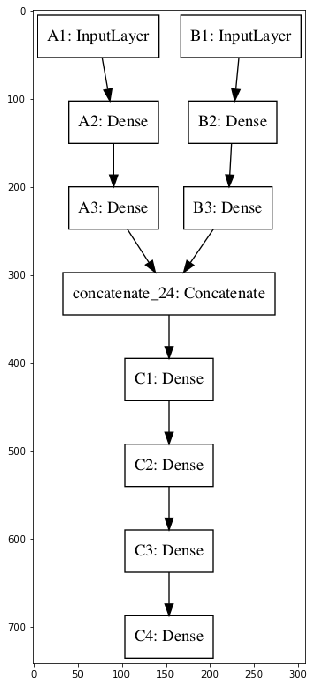

In [397]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

# Summarize the model
model.summary()


# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.figure(figsize = (12,12))
plt.imshow(data)
plt.show()

In [386]:
X_train, X_test, y_train, y_test, d2v_train, d2v_test = train_test_split(comb_down, test_label, X,test_size = 0.1, random_state = 0)


In [399]:
early_stopping_monitor = EarlyStopping(patience=2)
A1 = Input(shape=(310,),name='A1')

A2 = Dense(512, activation='relu',name='A2')(A1)
A3 = Dense(512, activation='relu',name='A3')(A2)
A4 = Dense(512, activation='relu',name='A4')(A3)
A5 = Dense(256, activation='relu',name='A5')(A4)


B1 = Input(shape=(300,),name='B1')
B2 = Dense(256, activation='relu',name='B2')(B1)
B3 = Dense(64, activation='relu',name='B3')(B2)

merged = Concatenate()([A3,B3])
C1 = Dense(320, activation='relu',name='C1')(merged)

C2 = Dense(160, activation='relu',name='C2')(C1)

C3 = Dense(160, activation='relu',name='C3')(C2)
C4 = Dense(1, activation='sigmoid',name='C4')(C3)
model = Model(inputs=[A1,B1],outputs = C4)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit([X_train,d2v_train], y_train, epochs=20, batch_size=None, validation_split=0.1, 
          verbose=True, callbacks = [early_stopping_monitor]) 

Train on 122121 samples, validate on 13569 samples
Epoch 1/20
122121/122121 [==============================] - 44s 356us/step - loss: 0.4186 - acc: 0.8097 - val_loss: 0.3989 - val_acc: 0.8205
Epoch 2/20
122121/122121 [==============================] - 36s 298us/step - loss: 0.3811 - acc: 0.8305 - val_loss: 0.3903 - val_acc: 0.8263
Epoch 3/20
122121/122121 [==============================] - 36s 296us/step - loss: 0.3614 - acc: 0.8408 - val_loss: 0.3873 - val_acc: 0.8294
Epoch 4/20
122121/122121 [==============================] - 36s 296us/step - loss: 0.3442 - acc: 0.8494 - val_loss: 0.3976 - val_acc: 0.8262
Epoch 5/20
122121/122121 [==============================] - 35s 289us/step - loss: 0.3257 - acc: 0.8575 - val_loss: 0.3900 - val_acc: 0.8314


In [395]:
model.evaluate([X_test, d2v_test], y_test)

15077/15077 [==============================] - 1s 79us/step


[0.39036395784484507, 0.8374345028851894]

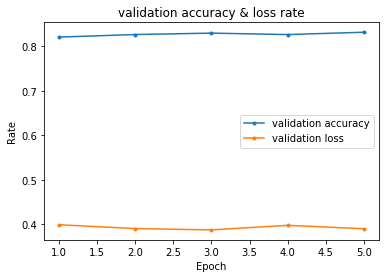

In [15]:
val_auc = [0.8205,0.8263,0.8294,0.8262,0.8314]
val_loss = [0.3989,0.3903,0.3873,0.3976,0.3900]
import matplotlib.pyplot as plt
plt.plot(range(1,6),val_auc,'.-', label = 'validation accuracy')
plt.plot(range(1,6),val_loss,'.-', label = 'validation loss')
plt.legend()
plt.title('validation accuracy & loss rate')
plt.xlabel('Epoch')
plt.ylabel('Rate')
plt.show()

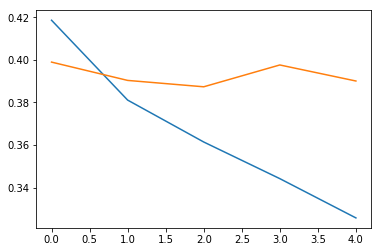

In [400]:
import matplotlib.pyplot as plt
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()

#Choose the best weight when val loss is at minimum
from keras.callbacks import ModelCheckpoint

# This checkpoint object will store the model parameters 
# in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', 
                             save_best_only=True)
# Store in a list to be used during training
callbacks_list = [checkpoint]
# Fit the model on a training set, using the checkpoint as a callback
model.fit(train_data, train_labels, validation_split=0.2, epochs=3,         
          callbacks=callbacks_list)
model.load_weights('weights.hdf5')
model.predict_classes(test_data)

Regularized neural network
Dropout
In each learning step:

Select a subset of the units
Ignore it in the forward pass
And in the back-propagation of error

it substantially reduces overfitting on a variety of tasks.
model.add(Dropout(0.25))


model.add(BatchNormalization())
Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1.
Dropout and BatchNormalization are sometimes incompatible because dropout slows down learning while BatchNormalization makes it incrementally faster. It's called disharmony of Dropout and BatchNormalization

conv1 = model.layers[0]
weight1 = conv1.get_weights()